 The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df= pd.read_csv("creditcard.csv", sep= ',')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


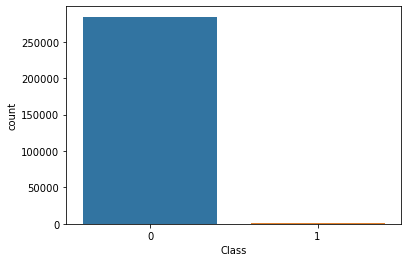

In [4]:
sns.countplot(df['Class'])
plt.show()

seeems like the data is imbalanced so we need imbalanced learn package

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.metrics import classification_report_imbalanced

In [6]:
#let's do some EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


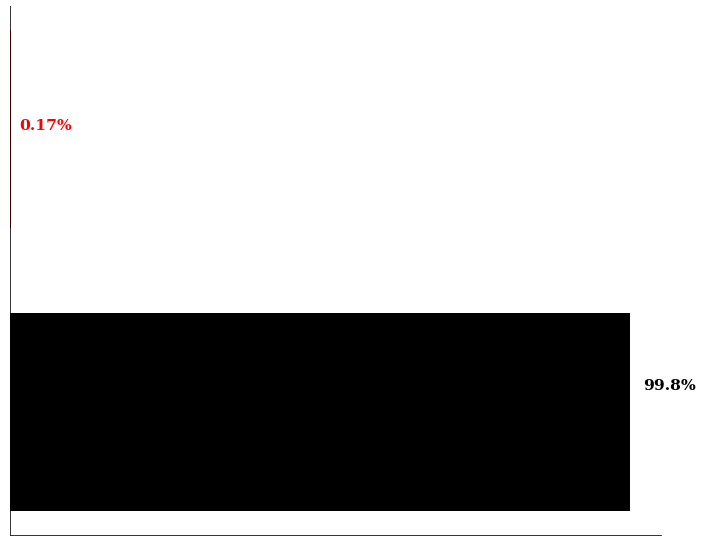

In [9]:
#let's visualize classes
d1= pd.DataFrame(df.groupby(['Class'])['Class'].count())
fig,axes=plt.subplots(figsize= (12,10), dpi= 70)
axes.barh([0],d1.Class[0], height= 0.7, color= 'black')
plt.text(290000,0.08, '99.8%',{'fontname':'Serif','weight':'bold' ,'size':'16','color':'black'})
axes.barh([1], d1.Class[1] ,height= 0.7, color= 'red')
plt.text(3900,1, '0.17%',{'fontname':'Serif', 'weight':'bold','size':'16','color':'red'})

axes.axes.get_xaxis().set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.show()


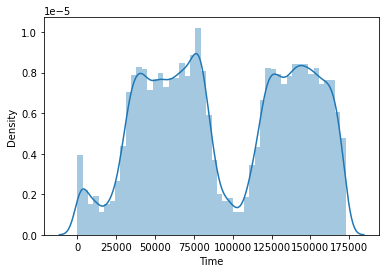

In [8]:
#let's do it without sampling and with oversampling
sns.distplot(df['Time'])
plt.show()

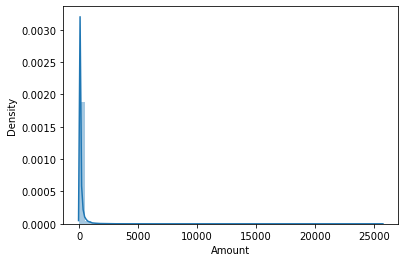

In [9]:
sns.distplot(df['Amount'])
plt.show()

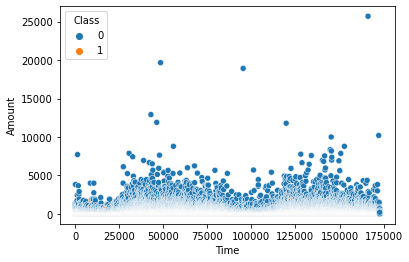

In [10]:
sns.scatterplot(x= 'Time', y='Amount', hue= 'Class', data = df)

plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

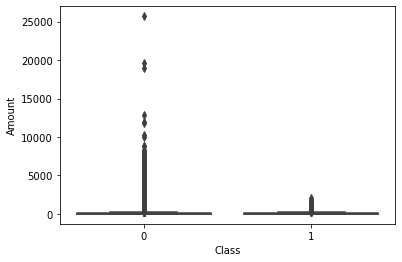

In [11]:
sns.boxplot(x=df['Class'], y=df['Amount'])

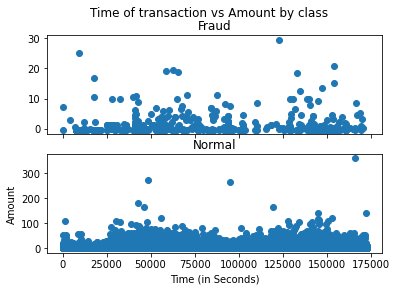

In [127]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(df[df.Class==1].Time, df[df.Class==1].Amount)
ax1.set_title('Fraud')

ax2.scatter(df[df.Class == 0].Time, df[df.Class == 0].Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

looks like there are outliers  time really do not play role so remove it 

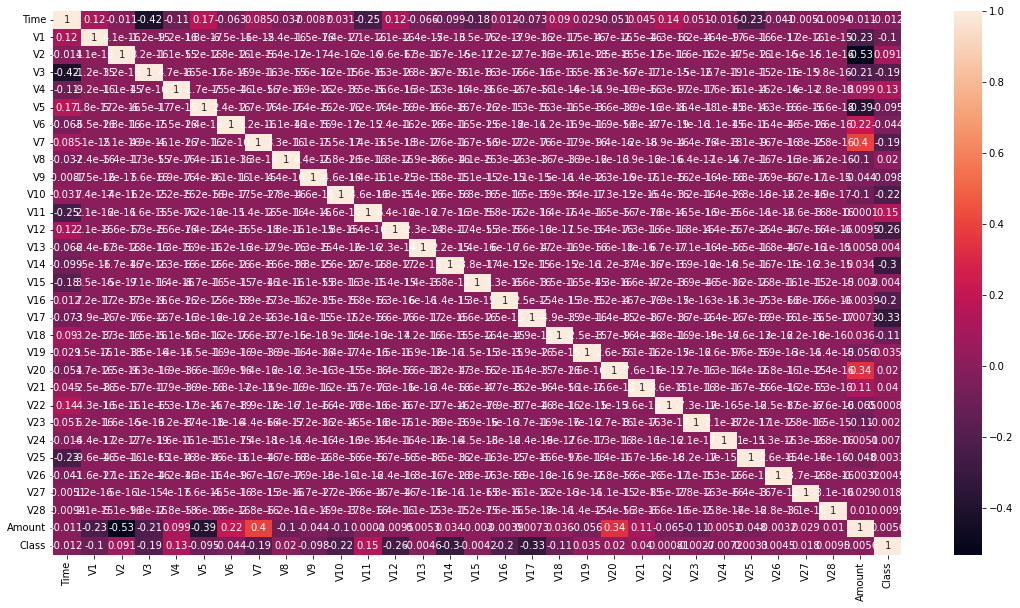

In [12]:
#let's checl correrlation now
plt.figure(figsize= (19,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
#becuasue of outliers let;s scale it
from sklearn.preprocessing import RobustScaler

rbst= RobustScaler()



In [14]:
df['Amount']= rbst.fit_transform(df['Amount'].values.reshape(-1,1))


In [15]:
target = 'Class'
predictors = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### splitting training and testing set

In [19]:
X= df.drop(['Class','Time'], axis =1)
Y= df.Class.values

In [20]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


##### importing relevant libraries


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size= 0.2, random_state= 10)

In [39]:
# a fucntion to see things easi;ly
def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("roc_score",roc_auc_score(y_test, preds))
    print("Precision :",metrics.precision_score(y_test, preds))
    print("Recall :",metrics.recall_score(y_test, preds))
    plt.plot(figsize=(27,12))
    
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',cmap="YlGnBu")

   
    plt.show()
   
    
    return accuracy_score(y_test,preds)


In [41]:
# a fucntion to see things easi;ly
def predict2(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("Precision :",metrics.precision_score(y_test, preds))
    print("Recall :",metrics.recall_score(y_test, preds))
    print("roc_score",roc_auc_score(y_test, preds))
    fig, axes = plt.subplots(1,2,figsize=(27,12))
    
    axes[0].set_title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',ax=axes[0],cmap="YlGnBu")

    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color='red',ax=axes[1])
    axes[1].set_title("Feature Importance")
    plt.show()
    return accuracy_score(y_test,preds)


[[56859     9]
 [   31    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8350272523604495
Precision : 0.875
Recall : 0.6702127659574468


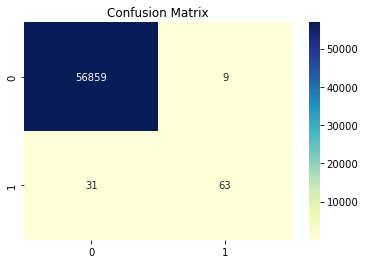

0.9992977774656788

In [42]:
predict(LogisticRegression(), X_train, X_test, y_train, y_test)

[22:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[56867     1]
 [   16    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.83      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.9873417721518988
Recall : 0.8297872340425532
roc_score 0.9148848247303573


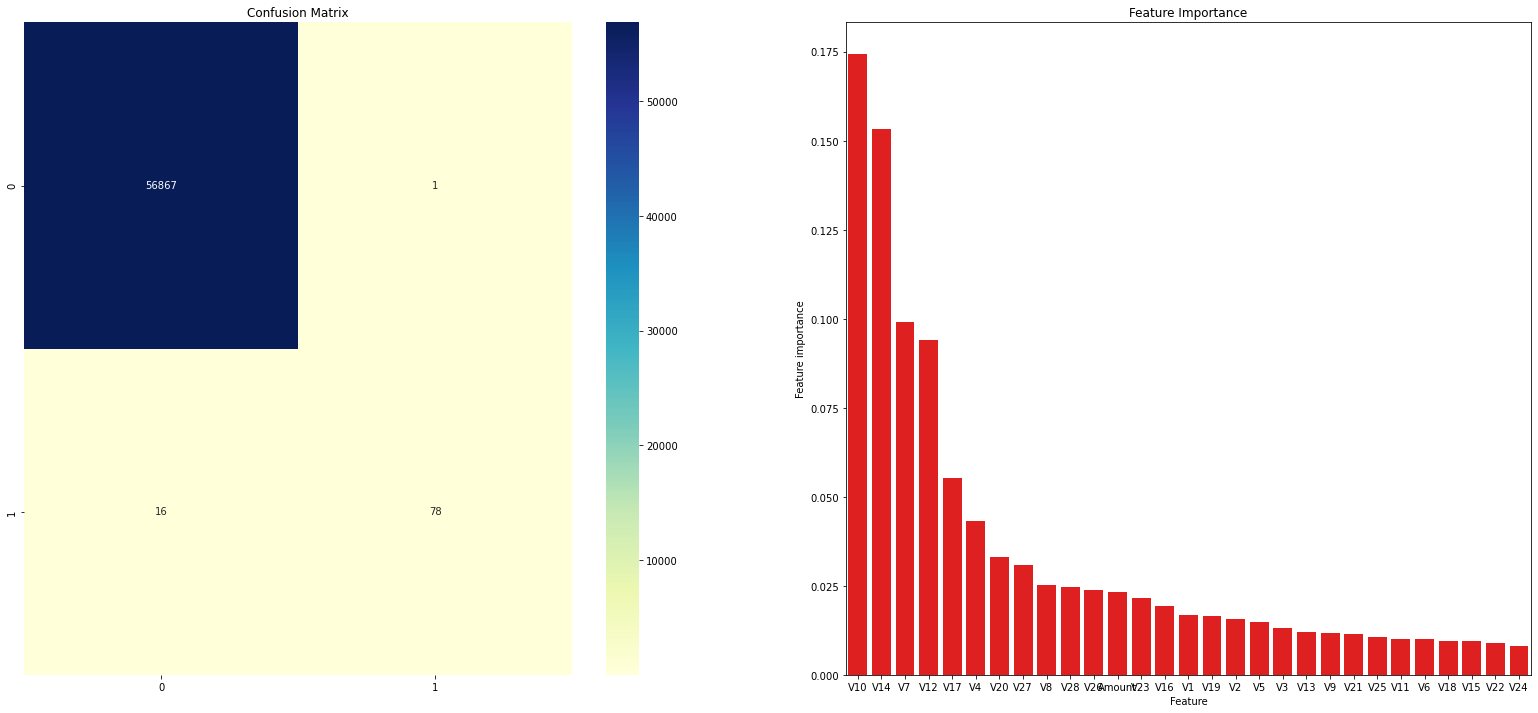

0.9997015554229135

In [43]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_train,X_test, y_train, y_test)

[[56866     2]
 [   17    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.97      0.82      0.89        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.9746835443037974
Recall : 0.8191489361702128
roc_score 0.9095568835032677


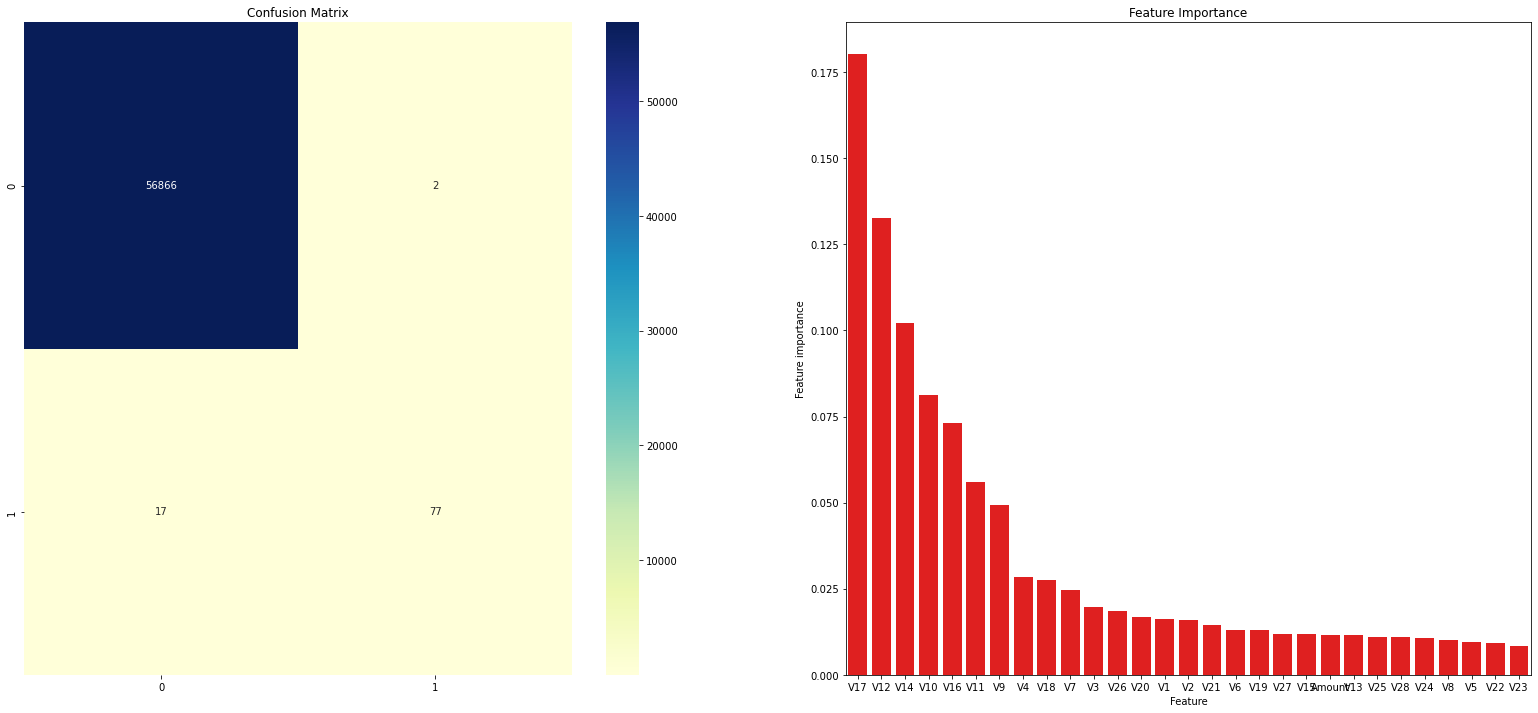

0.9996664442961974

In [44]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_train,X_test, y_train, y_test)

[[56854    14]
 [   23    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.84      0.76      0.79        94

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.8352941176470589
Recall : 0.7553191489361702
roc_score 0.8775364823952144


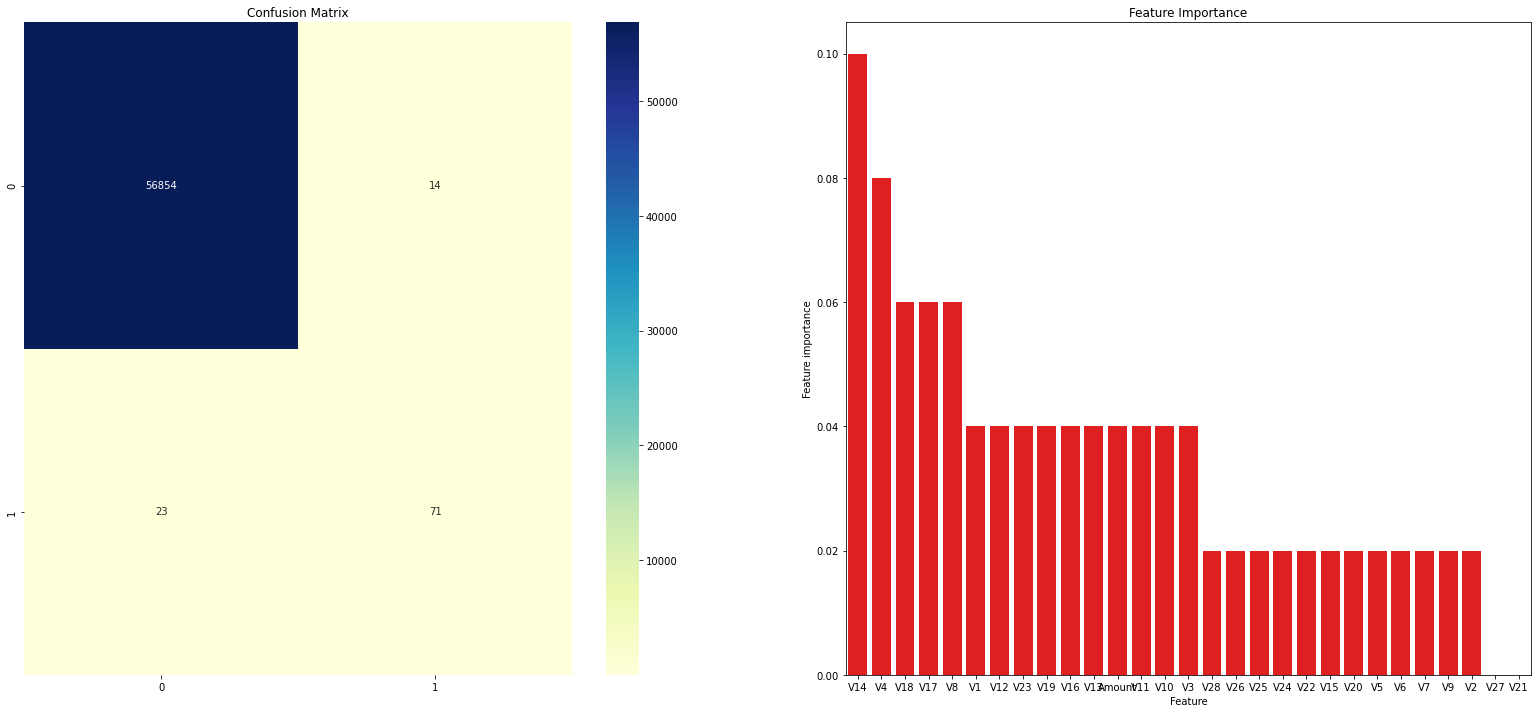

0.9993504441557529

In [45]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_train,X_test, y_train, y_test)

[[56851    17]
 [   32    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.78      0.66      0.72        94

    accuracy                           1.00     56962
   macro avg       0.89      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.7848101265822784
Recall : 0.6595744680851063
roc_score 0.8296377650969247


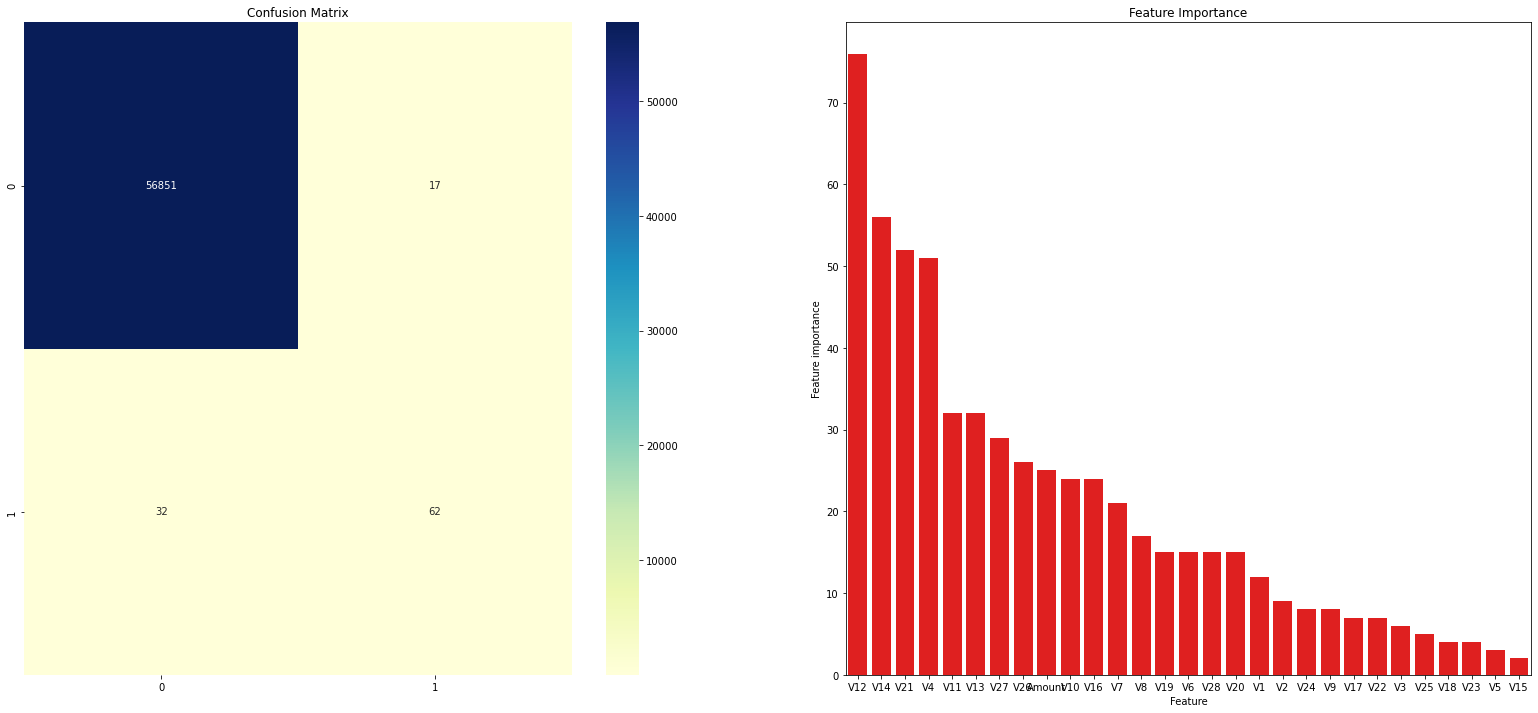

0.9991397773954567

In [46]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_train,X_test, y_train, y_test)

[[56867     1]
 [   21    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.78      0.87        94

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8882890800495062
Precision : 0.9864864864864865
Recall : 0.776595744680851


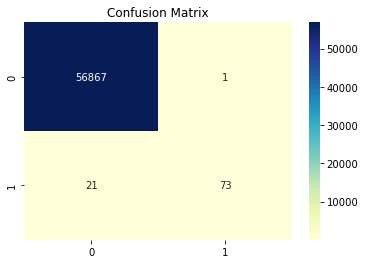

0.9996137776061234

In [47]:
predict(Knn(n_neighbors=5),X_train,X_test,y_train,y_test)

[[55580  1288]
 [   16    78]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.83      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962

roc_score 0.90356914631719
Precision : 0.05710102489019034
Recall : 0.8297872340425532


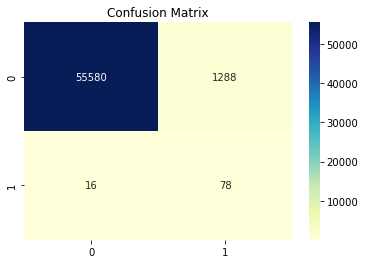

0.9771075453811313

In [48]:
predict(GaussianNB(),X_train,X_test,y_train,y_test )

now le'ts try same after sampling


In [77]:
smt = SMOTE(random_state=42)

X_smote,Y_smote = smt.fit_resample(X_train,y_train)

[[55366  1502]
 [    9    85]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.90      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9389216386136465
Precision : 0.05356017643352237
Recall : 0.9042553191489362


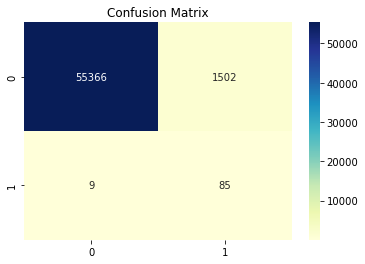

0.9734735437660195

In [78]:
predict(LogisticRegression(), X_smote, X_test, Y_smote, y_test)

[22:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[56322   546]
 [   11    83]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56868
           1       0.13      0.88      0.23        94

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Precision : 0.13195548489666137
Recall : 0.8829787234042553
roc_score 0.9366887708601778


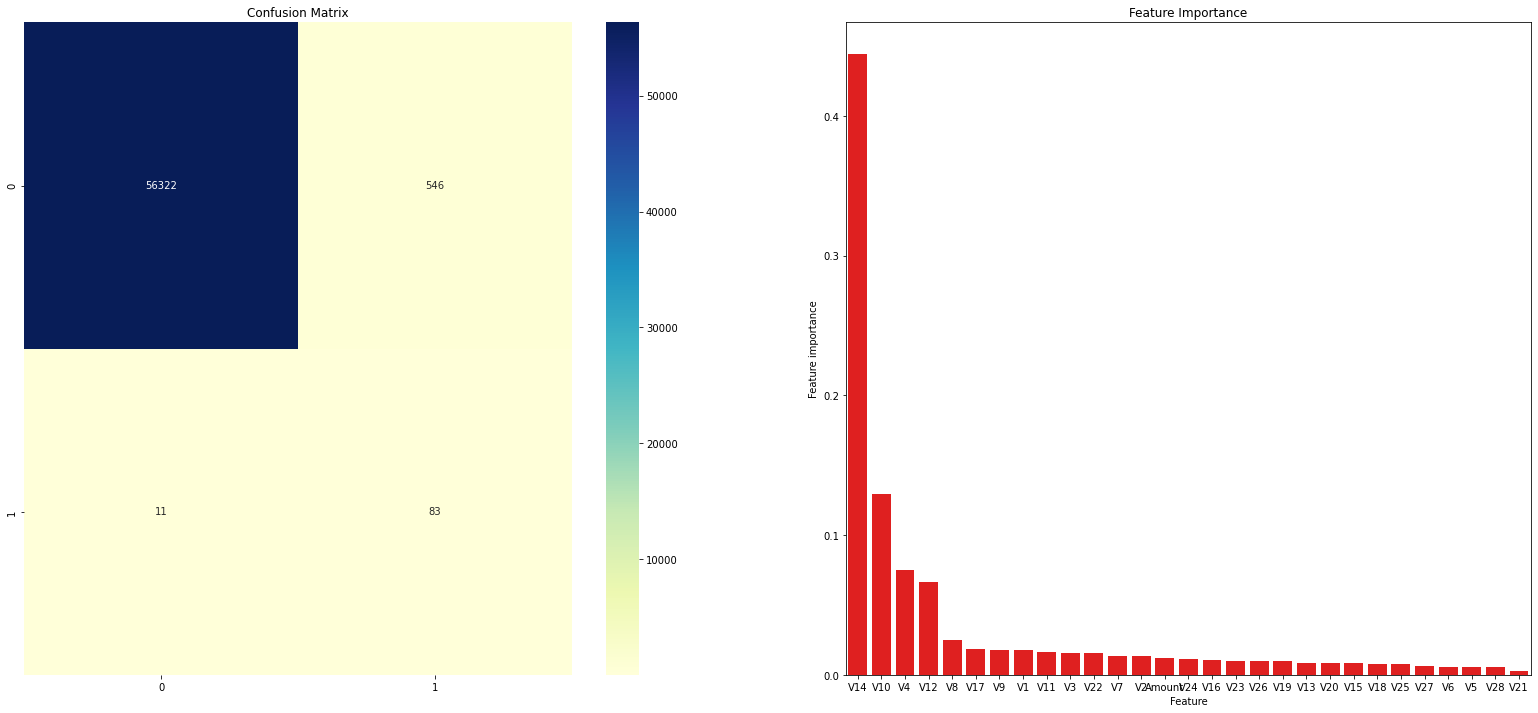

0.9902215512095783

In [79]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_smote,X_test, Y_smote, y_test)

[[56857    11]
 [   17    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.82      0.85        94

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Precision : 0.875
Recall : 0.8191489361702128
roc_score 0.9094777528849938


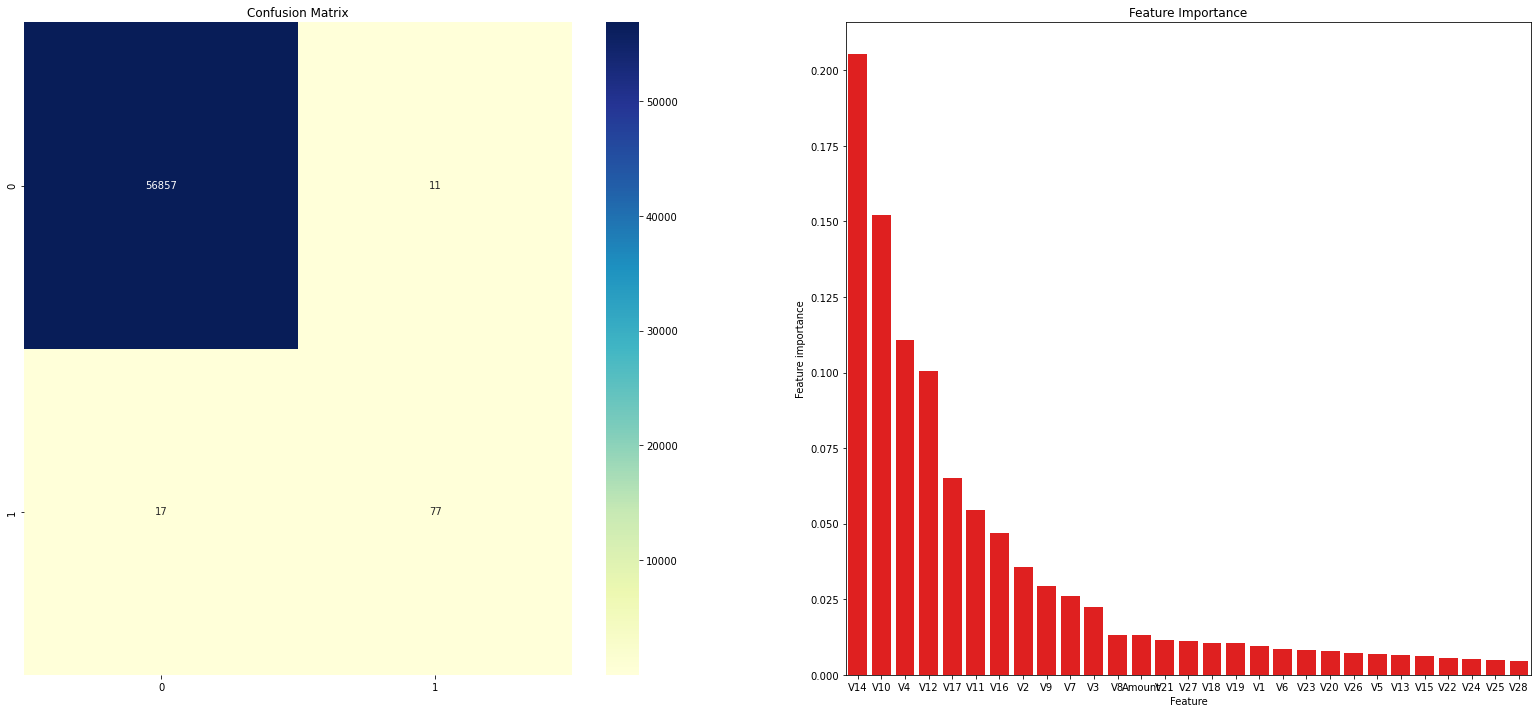

0.9995084442259752

In [80]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_smote,X_test, Y_smote, y_test)

In [81]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_smote,X_test, Y_smote, y_test)

KeyboardInterrupt: 

In [ ]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_smote,X_test, Y_smote, y_test)

In [ ]:
X

In [58]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [63]:
outlier_fraction

0.0017304750013189597

In [50]:
n_outliers = len(fraud)

In [55]:
state = np.random.RandomState(42)

In [59]:
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [65]:
model = IsolationForest(contamination= outlier_fraction, random_state = 42, verbose=1)
model.fit(X)

y_pred = model.predict(X)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


In [71]:
y_pred[y_pred == 1] = 0  # for reshaping the prediction values
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()

In [72]:
print("erros",n_errors)

erros 492


In [68]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



looks like ML models are quite good for these but accuracy does decrease when you use balanced data now let's try some neural networks on these

In [69]:
#let's try with imbalanced data for now
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from keras.layers.recurrent import LSTM

In [74]:
n_inputs = len(X_train.columns)

In [75]:
model = Sequential()

# First Hidden Layer 
model.add(Dense(50, input_dim = n_inputs, activation = 'relu', kernel_initializer = 'he_uniform'))

# Define output layer
model.add(Dense(1, activation = 'sigmoid'))


In [82]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam'
)

In [83]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
7121/7121 [==============================] - 20s 3ms/step - loss: 0.0106
Epoch 2/20
7121/7121 [==============================] - 36s 5ms/step - loss: 0.0034: 0s - loss: 0.00
Epoch 3/20
7121/7121 [==============================] - 80s 11ms/step - loss: 0.0028
Epoch 4/20
7121/7121 [==============================] - 31s 4ms/step - loss: 0.0026
Epoch 5/20
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0024
Epoch 6/20
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0023
Epoch 7/20
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0021: 0s - l
Epoch 8/20
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0021
Epoch 9/20
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0021
Epoch 10/20
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0020
Epoch 11/20
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0020
Epoch 12/20
7121/7121 [=========================

In [84]:
y_pred_nn = model.predict_classes(X_test)

In [85]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9996137776061234
Precision Neural Net: 0.95
Recall Neural Net: 0.8085106382978723
F1 Score Neural Net: 0.8735632183908046


In [86]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9647569436649861


In [87]:
#not bad now lets try with smote balanced one
model.fit(X_smote, Y_smote, epochs = 20)

Epoch 1/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0089
Epoch 2/20
14216/14216 [==============================] - 29s 2ms/step - loss: 0.0039
Epoch 3/20
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0028
Epoch 4/20
14216/14216 [==============================] - 40s 3ms/step - loss: 0.0022
Epoch 5/20
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0020
Epoch 6/20
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0018
Epoch 7/20
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0015
Epoch 8/20
14216/14216 [==============================] - 28s 2ms/step - loss: 0.0015
Epoch 9/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0015
Epoch 10/20
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0011
Epoch 11/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0011
Epoch 12/20
14216/14216 [===========================

In [88]:
y_pred_nn = model.predict_classes(X_test)

In [89]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9990519995786665
Precision Neural Net: 0.6754385964912281
Recall Neural Net: 0.8191489361702128
F1 Score Neural Net: 0.7403846153846153


In [90]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)


AUC Neural Net:  0.9661625877919602


In [91]:
#let's  try multi layer perceptron as well
from sklearn.neural_network import MLPClassifier

[[56860     8]
 [   18    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.90      0.81      0.85        94

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.9041849808215816
Precision : 0.9047619047619048
Recall : 0.8085106382978723


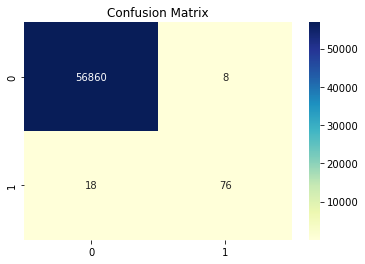

0.9995435553526912

In [92]:
predict(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2),X_train,X_test,y_train,y_test)

[[56845    23]
 [   20    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.76      0.79      0.77        94

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8934147985854514
Precision : 0.7628865979381443
Recall : 0.7872340425531915


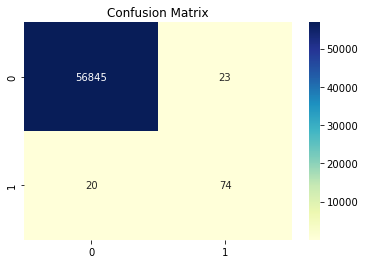

0.9992451107756047

In [93]:
predict(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2),X_smote,X_test,Y_smote,y_test)

[[56748   120]
 [   12    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.41      0.87      0.55        94

    accuracy                           1.00     56962
   macro avg       0.70      0.94      0.78     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.9351151378556388
Precision : 0.40594059405940597
Recall : 0.8723404255319149


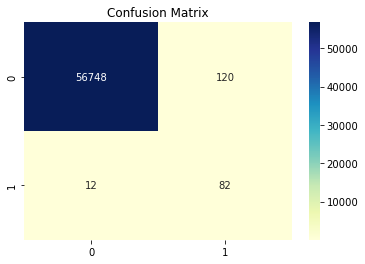

0.9976826656367402

In [94]:
predict(Knn(n_neighbors=5),X_smote,X_test,Y_smote,y_test)

[[55399  1469]
 [   14    80]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.85      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.54     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9126160395331331
Precision : 0.051646223369916075
Recall : 0.851063829787234


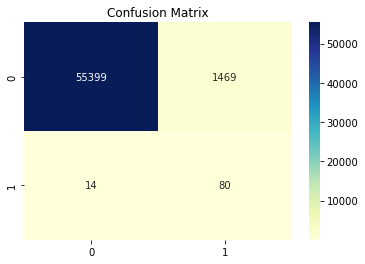

0.9739650995400443

In [95]:
predict(GaussianNB(),X_smote,X_test,Y_smote,y_test )

In [99]:
#now let's try with some dense networks
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [100]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [102]:
history = model.fit(X_train, y_train, epochs = 10,  validation_split = 0.15, verbose = 1,
                    )
history_dict = history.history

Epoch 1/10
6053/6053 [==============================] - 18s 3ms/step - loss: 0.0105 - accuracy: 0.9983 - val_loss: 0.0040 - val_accuracy: 0.9988
Epoch 2/10
6053/6053 [==============================] - 18s 3ms/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.0046 - val_accuracy: 0.9988
Epoch 3/10
6053/6053 [==============================] - 18s 3ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 4/10
6053/6053 [==============================] - 18s 3ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 5/10
6053/6053 [==============================] - 19s 3ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 6/10
6053/6053 [==============================] - 17s 3ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 7/10
6053/6053 [==============================] - 17s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0040 - val_ac

Text(0.5, 0, 'Epochs')

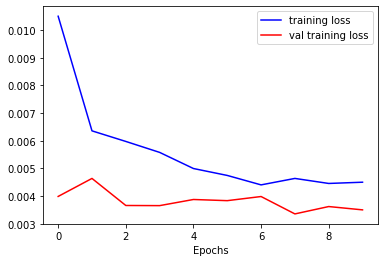

In [103]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

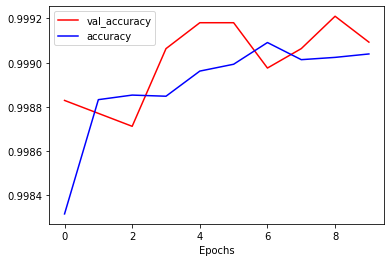

In [104]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [105]:
y_pred_nn = model.predict_classes(X_test)

In [106]:
#let's try same with balanced datasets as well


In [107]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9993328885923949
Precision Neural Net: 0.9117647058823529
Recall Neural Net: 0.6595744680851063
F1 Score Neural Net: 0.7654320987654322


In [108]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9712505181839541


Using auto encoders now